In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression

In [65]:
dataset_file = "/content/loan_data.csv"

df = pd.read_csv(dataset_file)

In [66]:
print(f"Size of the dataset: {df.shape}")
df.head()

Size of the dataset: (9578, 14)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [67]:
# No need to handle missing values
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [68]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Later on the notebooks we will have to encode the ["purpose"] column

In [69]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#Data visualization and exploration

In [71]:
print(df["purpose"].value_counts())
print("------------------------")
print(df["credit.policy"].value_counts())

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
------------------------
1    7710
0    1868
Name: credit.policy, dtype: int64


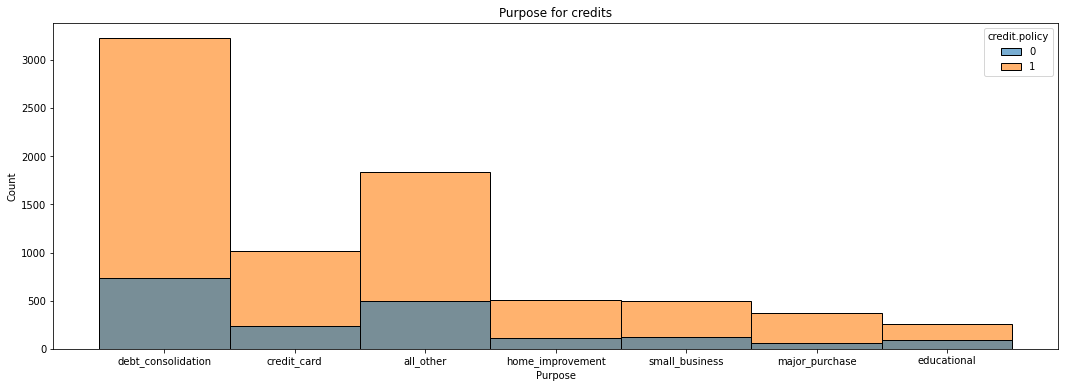

In [72]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x=df["purpose"], hue="credit.policy", alpha=0.6)
plt.title("Purpose for credits")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.show()

As we can see above, most of the credits are taken for debt consolidation, with a considerable difference between the second one, (other credits). The educational creadits are the least selected by clients

In [73]:
purpose_list = df["purpose"].unique().tolist()
purpose_list

['debt_consolidation',
 'credit_card',
 'all_other',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

In [74]:
int_avg_list = []

for purpose in purpose_list:
  purpose_df = df.loc[df["purpose"] == purpose]
  int_rate_avg = (purpose_df["int.rate"].sum() / len(purpose_df["int.rate"])).round(4)

  int_avg_list.append(int_rate_avg)


my_dict = {"Purpose": purpose_list, "Int.rate": int_avg_list}
int_df = pd.DataFrame(my_dict)

int_df

,Purpose,Int.rate
0,debt_consolidation,0.1266
1,credit_card,0.1197
2,all_other,0.1168
3,home_improvement,0.1175
4,small_business,0.1381
5,major_purchase,0.1142
6,educational,0.1199


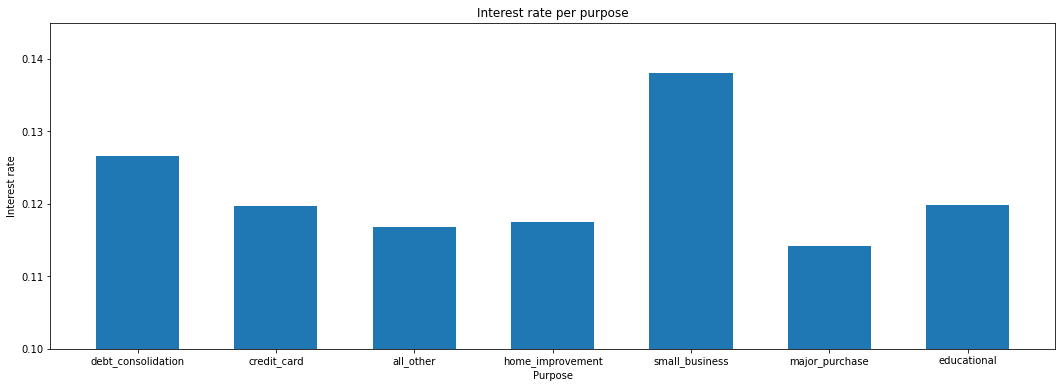

In [75]:
plt.figure(figsize=(18, 6))
plt.bar(int_df["Purpose"], int_df["Int.rate"], width=0.6)
plt.ylim(0.1, None)
plt.title("Interest rate per purpose")
plt.xlabel("Purpose")
plt.ylabel("Interest rate")
plt.show()

In the graph above we can see the average interest rate per purpose of loan. It is appreciable that small business has the highest interest rate, we can especulate that this is due to the risk that they are involved. In the other hand, major purchases have the lowest interest rate.

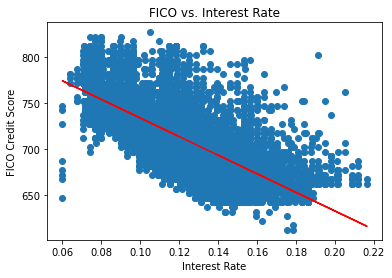

In [76]:
fit = np.polyfit(df["int.rate"], df["fico"], 1)
line_of_best_fit = np.poly1d(fit)

plt.scatter(df["int.rate"],df["fico"])
plt.plot(df["int.rate"], line_of_best_fit(df["int.rate"]), color='red')
plt.xlabel("Interest Rate")
plt.ylabel("FICO Credit Score")
plt.title("FICO vs. Interest Rate")
plt.show()


In [77]:
correlation_mat = df[["int.rate", "fico"]].corr(method="spearman")
correlation_mat

,int.rate,fico
int.rate,1.000000,-0.744986
fico,-0.744986,1.000000


With this scatter plot we can visualize a clear negative correlation between the FICO credit score and the Interest rate. This is proven also in the shown matrix.

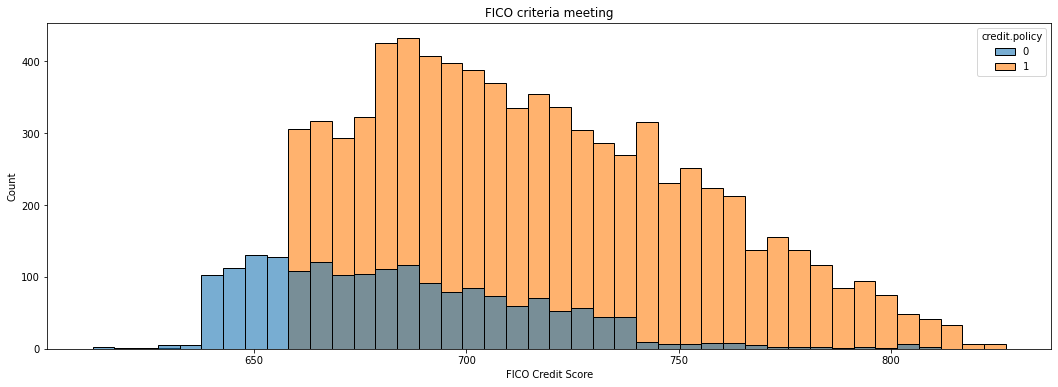

In [78]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x=df["fico"], hue="credit.policy", alpha=0.6)
plt.title("FICO criteria meeting")
plt.xlabel("FICO Credit Score")
plt.ylabel("Count")
plt.show()

This histogram gives us one of the most relevant factors when it comes to meeting the criteria for the loan. People with low FICO Credit Score tend to get their loan rejected

#Encoding

The only column that we will have to encode to train ad test the model will be the ["purpose"] column.

In [79]:
le = LabelEncoder()

In [80]:
df["purpose"] = le.fit_transform(df["purpose"])

In [81]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


The values were correctly encoded

#Model

In [82]:
# All the columns are important for the model, so we are keeping them all, except for the one we try to predict
X = df.drop(columns=["credit.policy"])
Y = df["credit.policy"]

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [84]:
# Sizes of the X's train and test datasets
print(X_train.shape, X_test.shape)

(7662, 13) (1916, 13)


In [85]:
# Initializing and training the model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
# Evaluating the model

X_train_pred = lr.predict(X_train)
train_acc = accuracy_score(X_train_pred, Y_train)

In [87]:
# Testing
X_test_pred = lr.predict(X_test)
test_acc_lr = accuracy_score(X_test_pred, Y_test)

print(f"The training accuracy is: {train_acc}")
print(f"The testing accuracy is: {test_acc_lr}")

The training accuracy is: 0.8717045157922213
The testing accuracy is: 0.8757828810020877


###Using Logistic Regression we obtained a 87.58% of accuracy on testing

#Predicting FICO Credit Score

Like we previously saw, there is a negative linear correlation between FICO Credit Score and Interest Rate, so we will predict the first variable.

In [88]:
# train_test_split function
X_train, X_test, Y_train, Y_test = train_test_split(df["int.rate"], df["fico"], test_size = 0.2, random_state = 2, stratify = Y)

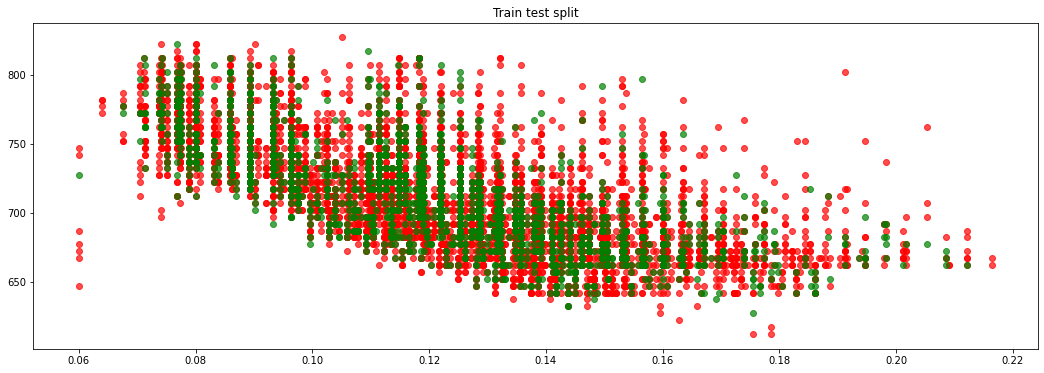

In [89]:
plt.figure(figsize=(18, 6))
plt.scatter(X_train, Y_train, color="r", label="Training Data", alpha=0.7)
plt.scatter(X_test, Y_test, color="g", label="Testing Data", alpha=0.7)
plt.title("Train test split")
plt.show()

# Visualizing the splits

In [90]:
# Training the model
lir = LinearRegression()
lir.fit(X_train.values.reshape(-1, 1), Y_train)

LinearRegression()

In [91]:
# We can ensure that there is a negative correlation by showing the coefficient of the line of perfect fit that we show previously

lir.coef_

array([-1008.85843091])

In [92]:
# Making predictions with the model
lin_pred = lir.predict(X_test.values.reshape(-1, 1))

In [93]:
lir.score(X_test.values.reshape(-1, 1), Y_test.values)

0.5234783812776489

The score of the linear model is 0.52